In [2]:
import pandas as pd
import numpy as np
scores = pd.read_csv('udn_scores.csv')
a = scores.groupby("time").mean().reset_index()
a


,time,title_score,text_score,return
0,2023-07-07,-3.482973,0.893589,0.010870
1,2023-07-09,5.471366,11.111531,NaN
2,2023-07-10,0.705039,3.072980,0.034946
3,2023-07-11,6.715508,3.644726,-0.010390


In [3]:
import pickle
with open("udn_timetext.pickle", "rb") as f:
    data = pickle.load(f)
data

{datetime.date(2023, 7, 11): ['7月11日盤前／費半指數止穩 靜待 CPI 數據公布 台股下檔有撐',
  '今日盤勢早盤受惠費半指數止穩，台股科技股開高。但隨著午盤因中國 PPI 指數創7年最大降幅，恐面臨通縮影響，亞股急殺，也導致台股尾盤翻黑。盤面權值股拉回休息：聯發科（2454）（2454）下跌1.32%、台積電平盤及鴻海下跌0.95%、國泰金下跌0.95%，台塑上漲0.37%。盤面熱門強勢股：AI 伺服器復活，辛耘、弘塑、緯穎、技嘉、世芯、廣達上漲，半導體檢測的宜特、閎康、汎銓。面板零組件達興材料續強。節能股：中興電、華城、士電上漲。盤面弱勢股集中在中小股：廣積、威強電、廣運、乙盛、茂達、萬海、盛達、定穎、僑威、海韻電。終場指數下跌11.41點，以16,652點作收，成交值2,676億元。觀察盤面變化，三大類股漲跌互見，其中電子下跌0.13%，傳產跌0.11%及金融上漲0.34%。在次族群部份，以數位雲端、百貨、電機等走勢最強，分別上漲0.89%、0.70%、0.53%。資金動向三大法人合計賣超144.43億元。其中外資賣超142.05億元，投信買超12.23億元，自營商賣超14.74億元。外資買超前五大為大亞、中工、友達、長榮航、宏碁；賣超前五大為開發金、台泥、聯電、英業達、鴻海。投信買超前五大為啟碁、遠東銀、英業達、台泥、智易；賣超前五大為長榮航、聯電、建準、中信金、緯創。資券變化方面，融資增5.57億元，融資餘額為2,026.9億元，融券減0.65萬張，融券餘額為28.78萬張。外資台指期部位，多單加碼2463口，淨多單部位2,219口。借券賣出金額為88.57億元。類股成交比重：電子70.27%、傳產26.7%、金融3.03%。今日盤勢分析聯準會主席鮑爾警示通膨問題比想像中還要持久，重申需要進一步升息來抑制通膨，今年再升息兩次「是很好的預測」。美國第一季GDP季增年率終值報2%，高於市場預期1.4%及初值1.3%，緩解經濟衰退擔憂。台股後市分析如下：第一、大陸國家統計局最新公布的數據，大陸6月消費者物價指數（CPI）持續回落，和去年同期相比已呈零增長。生產者物價指數（PPI）和去年同期相比則大跌5.4%，創近七年半以來最大跌幅。受石油、煤炭等大宗商品價格繼續回落，以及去年同期比較基期較高等因素影響，大陸6月PPI月比、年

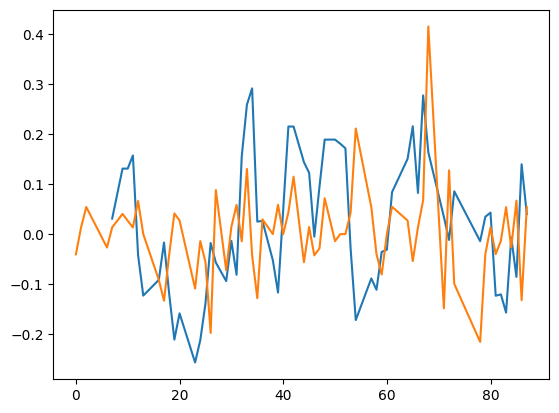

<Figure size 2000x1000 with 0 Axes>

In [119]:
a = a.dropna(subset=["return"])
a["text_score"] = a["text_score"].fillna(a["title_score"])
a["text_score"] = np.where(a["text_score"] == 0, a["title_score"], a["text_score"])
a["text_score"].isna().sum()
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig = plt.figure(figsize = (20, 10))
ax.plot(a["text_score"].rolling(window=5).mean()-0.3)
ax.plot(a["return"]*5)
"""for k, i in enumerate(a["return"].index):
    try:
        ax.axvline(i, linestyle='--', color='red')
    except:
        pass"""
plt.show()

In [117]:
a["return"].corr(a["text_score"])

-0.12793360677043564

In [ ]:
a
i = 1
s = a["return"].first_valid_index()
a["return_lag0"] = a["return"].shift(0)
a["text_score"] = a["text_score"].fillna(a["title_score"])
a["text_score"] = a["text_score"].fillna(method="ffill")
a["text_score"] =  np.where(a["text_score"] == 0, a["title_score"], a["text_score"])

while True:
    if a[s:]["return"].isna().sum() == 0:
        break
    a[f"return_lag{i}"] = a["return"].shift(i)
    a[f"text_lag{i}"] = a["text_score"].shift(i)
    a["return"] = a["return"].fillna(a[f"return_lag{i}"])
    i += 1


# replace and text_score by mean with previous where return is na
"""for k in range(i-1):
    a["text_score"] = a["text_score"] + a[f"text_lag{k+1}"]
a["text_score"] = a["text_score"] / i"""
    